In [20]:
function Plot(t,y)
    
ax = gca;
h0 = get(ax,'children'); % This is the handle to the plotted line
x1 = get(h0,'xdata');    % Get data for line
y1 = get(h0,'ydata');
[ax, p1, p2] = plotyy(ax,t,y(:,1),t,y(:,2));

set(ax(1),"linewidth", 1.5,"fontsize", 16)
set(ax(2),"linewidth", 1.5,"fontsize", 16)
ylabel(ax(1),"Satellistes")
ylabel(ax(2), 'Debris')
xlabel("years","fontsize", 16)
set(p1,"linewidth",1.2)
set(p2,"linewidth",1.2)

legend("sattelites","debris")

end 

In [21]:
function df= stdDiff(t,var,params)
 A=params(1);
 x=params(2);
 beta=params(3);
 alpha=params(4);
  
  N=var(1);
  n=var(2);
  
  df=zeros(2,1);
  df(1)= A-x*n*N;
  df(2)= beta*A+alpha*x*n*N;
end

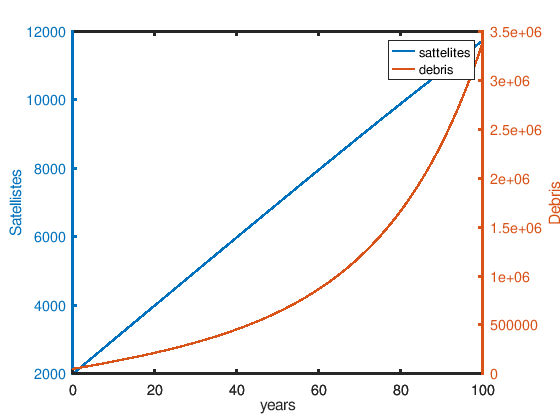

In [22]:
%-------------%
% Standard Model

A=100;
x= 3e-10;
beta=70;
alpha=1e4;
params1=[A;x;beta;alpha];

y01=[2000;5e4]; 


tspan1=[0:1:100];
[t1,y1]=ode45(@(t1,y1)stdDiff(t1,y1,params1),tspan1,y01);
#subplot(1,2,1)
Plot(t1,y1)
set(gcf,'Visible','on')

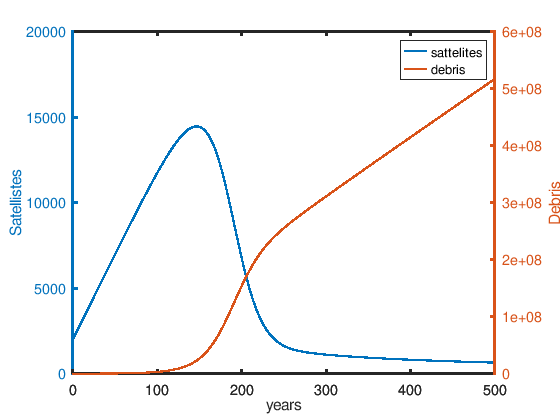

In [23]:
tspan2=[0:1:500];
[t2,y2]=ode45(@(t2,y2)stdDiff(t2,y2,params1),tspan2,y01);
#subplot(1,2,2)
Plot(t2,y2)
set(gcf,'Visible','on')

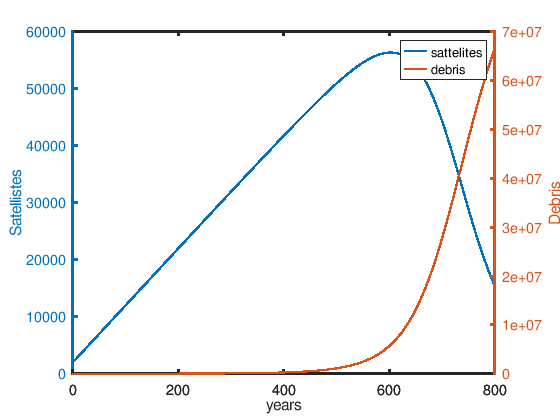

In [24]:
%-------------%
% Changing few parameters:

beta2=0;
alpha2=1e3;
params2=[A;x;beta2;alpha2];

yo2=[2000;2e4];
figure;

tspan3=[0:1:800];
[t2,y2]=ode45(@(t2,y2)stdDiff(t2,y2,params2),tspan3,yo2);
Plot(t2,y2)
set(gcf,'Visible','on')

In [25]:
function df= VarDiff(t,var)
a=31.41;
b=7.794;
c=1.935;
d=0.1680;
f=14420;
g=-10430;
h=0.5712;
k=-0.9996;
p=184.9;
q=-137.9;
x=6.895e-10;
y=1.369e-9;
z=2.869e-14;
alpha=10000;
beta=70;
gamma=56000;
  
  N=var(1);
  n=var(2);
  
   df=zeros(2,1);

   df(1)=(a+b*sin(c*t+d))-(N/(f+g))-(x*n*N)-(2*y*N*N); 
   df(2)=beta*(a+b*sin(c*t+d))-(n/(p+q))+(alpha*x*n*N)+(gamma*y*N*N)-(2*z*n*n);
end

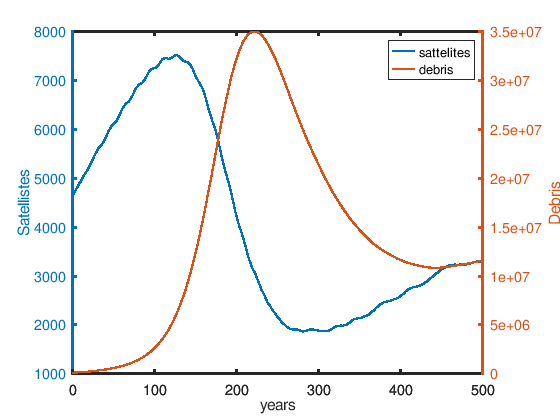

In [26]:
%-----------------
% variation in standard model
yo=[4650;110400];
tspan1=[0:1:500];
[t1,y1]=ode45(@(t1,y1)VarDiff(t1,y1),tspan1,yo);
Plot(t1,y1);
set(gcf,'Visible','on')

In [27]:
function df= Jacobian(t,var,params)
a=31.41;
b=7.794;
c=1.935;
d=0.1680;
f=14420;
g=-10430;
h=0.5712;
k=-0.9996;
p=130;
q=-137.9;
x=6.895e-10;
y=1.369e-9;
z=2.869e-14;
alpha=10000;
beta=70;
gamma=56000;
  
  N=var(1);
  n=var(2);
  
  df=zeros(2,1);
 
   % approx for phase portraits
   df(1)=a-x*n*N;
   df(2)=beta*a-n/p+alpha*x*n*N;
end

matrix =

  -2.8351e-02  -7.6388e-07
   2.8351e+02  -5.3472e-05

eigenvalues =

  -0.014202 + 0.004047i
  -0.014202 - 0.004047i



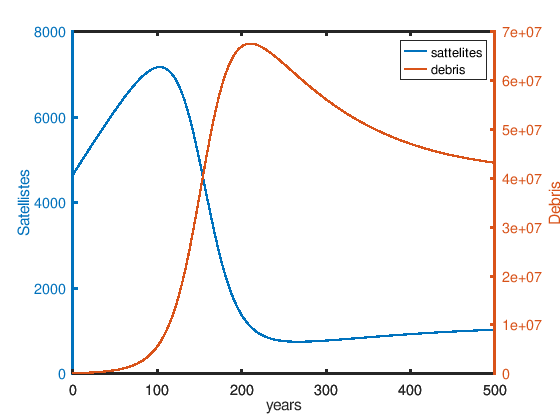

In [28]:
a=31.41;
x=6.895e-10;
p=130;
alpha=10000;
beta=70;

[t1,y1]=ode45(@(t1,y1)Jacobian(t1,y1),tspan1,yo);
Plot(t1,y1);
set(gcf,'Visible','on')
matrix=[-x*a*p*(alpha+beta) -1/(p*(alpha+beta));alpha*x*a*p*(alpha+beta) alpha/(p*(alpha+beta))-1/p]
eigenvalues=eig(matrix)